In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import fill
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [425]:
#data import
raw_stats18 = pd.read_csv("data/team_total_stats_18.csv")
raw_stats = pd.read_csv("data/team_total_stats.csv")

raw_season = pd.read_csv("data/Seasons_Stats.csv")
raw_season = raw_season.drop(columns=['Unnamed: 0'])

raw_player = pd.read_csv("data/player_data.csv")

celtics = pd.read_csv("data/Celtics_19.csv")
celtics_players = pd.read_csv("data/Celtics_players_19.csv")

In [32]:
raw_stats18.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV% (O),ORB% (O),FT/FGA (O),eFG% (D),TOV% (D),DRB% (D),FT/FGA (D),Arena,Attend.,Attend./G
0,1.0,Milwaukee Bucks*,26.9,60.0,22.0,61,21,8.87,-0.82,8.04,...,12.0,20.8,0.197,0.503,11.5,80.3,0.162,Fiserv Forum,721692,17602
1,2.0,Golden State Warriors*,28.4,57.0,25.0,56,26,6.46,-0.04,6.42,...,12.6,22.5,0.182,0.508,11.7,77.1,0.205,Oracle Arena,803436,19596
2,3.0,Toronto Raptors*,27.3,58.0,24.0,56,26,6.09,-0.60,5.49,...,12.4,21.9,0.198,0.509,13.1,77.1,0.190,Scotiabank Arena,812822,19825
3,4.0,Utah Jazz*,27.3,50.0,32.0,54,28,5.26,0.03,5.28,...,13.4,22.9,0.217,0.507,12.4,80.3,0.189,Vivint Smart Home Arena,750546,18306
4,5.0,Houston Rockets*,29.2,53.0,29.0,53,29,4.77,0.19,4.96,...,12.0,22.8,0.221,0.525,13.4,74.4,0.210,Toyota Center,740392,18058


# Part 1: Current Performance

In [54]:
stats18 = raw_stats18[['Team','W','eFG% (O)','eFG% (D)','TOV% (O)','TOV% (D)','ORB% (O)','DRB% (D)','FT/FGA (O)','FT/FGA (D)']]
stats18 = stats18.drop(30, axis=0)
stats18['W'] = stats18['W'].astype(int)

stats18.to_excel("figures/2018 Team Stats.xlsx")  
stats18.head()

,Team,W,eFG% (O),eFG% (D),TOV% (O),TOV% (D),ORB% (O),DRB% (D),FT/FGA (O),FT/FGA (D)
0,Milwaukee Bucks*,60,0.550,0.503,12.0,11.5,20.8,80.3,0.197,0.162
1,Golden State Warriors*,57,0.565,0.508,12.6,11.7,22.5,77.1,0.182,0.205
2,Toronto Raptors*,58,0.543,0.509,12.4,13.1,21.9,77.1,0.198,0.190
3,Utah Jazz*,50,0.538,0.507,13.4,12.4,22.9,80.3,0.217,0.189
4,Houston Rockets*,53,0.542,0.525,12.0,13.4,22.8,74.4,0.221,0.210


In [55]:
factors = ['Team','W','eFG% (O)','eFG% (D)','TOV% (O)','TOV% (D)','ORB% (O)','DRB% (D)','FT/FGA (O)','FT/FGA (D)']
desc = ['eFG% (O)','TOV% (D)','ORB% (O)','DRB% (D)','FT/FGA (O)'] # higher = better
asc = ['eFG% (D)','TOV% (O)','FT/FGA (D)'] # lower = better

ranks18 = stats18[['Team','W']]

for f in desc:
    ranks18[f] = stats18[f].rank(method='min', ascending=False).astype(int)
    
for f in asc:
    ranks18[f] = stats18[f].rank(method='min', ascending=True).astype(int)
    
ranks18 = ranks18[factors]

ranks18.to_excel("figures/2018 Team Rankings.xlsx") 
ranks18.head()

C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Team,W,eFG% (O),eFG% (D),TOV% (O),TOV% (D),ORB% (O),DRB% (D),FT/FGA (O),FT/FGA (D)
0,Milwaukee Bucks*,60,2,1,9,25,27,1,15,1
1,Golden State Warriors*,57,1,3,18,20,16,14,23,21
2,Toronto Raptors*,58,3,4,15,9,21,14,14,9
3,Utah Jazz*,50,5,2,27,14,13,1,4,8
4,Houston Rockets*,53,4,18,9,7,14,28,3,25


In [56]:
stats = raw_stats[['Team','W','eFG% (O)','eFG% (D)','TOV% (O)','TOV% (D)','ORB% (O)','DRB% (D)','FT/FGA (O)','FT/FGA (D)']]
stats = stats.drop(30, axis=0)
stats['W'] = stats['W'].astype(int)

stats.to_excel("figures/2019 Team Stats.xlsx")  
stats.head()

,Team,W,eFG% (O),eFG% (D),TOV% (O),TOV% (D),ORB% (O),DRB% (D),FT/FGA (O),FT/FGA (D)
0,Milwaukee Bucks*,55,0.554,0.488,12.9,12.1,20.8,81.9,0.200,0.176
1,Los Angeles Clippers*,46,0.534,0.504,12.7,12.2,23.7,77.4,0.233,0.209
2,Los Angeles Lakers*,51,0.541,0.509,13.3,14.0,24.2,79.0,0.202,0.208
3,Boston Celtics*,46,0.532,0.512,12.1,13.6,23.8,77.7,0.208,0.214
4,Toronto Raptors*,49,0.535,0.502,13.0,14.5,21.1,76.5,0.209,0.200


In [57]:
ranks = stats[['Team','W']]

for f in desc:
    ranks[f] = stats[f].rank(method='min', ascending=False).astype(int)
    
for f in asc:
    ranks[f] = stats[f].rank(method='min', ascending=True).astype(int)
    
ranks = ranks[factors]

ranks.to_excel("figures/2019 Team Rankings.xlsx") 
ranks.head()

C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Team,W,eFG% (O),eFG% (D),TOV% (O),TOV% (D),ORB% (O),DRB% (D),FT/FGA (O),FT/FGA (D)
0,Milwaukee Bucks*,55,1,1,15,24,26,1,16,6
1,Los Angeles Clippers*,46,10,3,12,23,9,16,3,18
2,Los Angeles Lakers*,51,5,4,22,3,4,6,15,16
3,Boston Celtics*,46,12,6,6,7,8,13,12,21
4,Toronto Raptors*,49,8,2,16,2,25,22,9,15


# Part 2: Regression Analysis

In [61]:
#create new dataset with 4 stats
orig = stats18

new = orig[['Team','W']]
new['Shooting'] = orig['eFG% (O)'] - orig['eFG% (D)']
new['Turnovers'] = orig['TOV% (O)'] - orig['TOV% (D)']
new['Rebounding'] = orig['ORB% (O)'] - orig['DRB% (D)']
new['Free Throws'] = orig['FT/FGA (O)'] - orig['FT/FGA (D)']

regdata18 = new

regdata18.head()


C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Team,W,Shooting,Turnovers,Rebounding,Free Throws
0,Milwaukee Bucks*,60,0.047,0.5,-59.5,0.035
1,Golden State Warriors*,57,0.057,0.9,-54.6,-0.023
2,Toronto Raptors*,58,0.034,-0.7,-55.2,0.008
3,Utah Jazz*,50,0.031,1.0,-57.4,0.028
4,Houston Rockets*,53,0.017,-1.4,-51.6,0.011


In [99]:
# split data into train/test

y = regdata18['W']
x = regdata18.drop(columns=['Team','W'])

tstpct = .3

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=tstpct)

x_train.shape

(21, 4)

In [102]:
X = x_train
Y = y_train
X2 = x_test
Y2 = y_test
 
    
# prediction with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

predictions = regr.predict(X2)
prediction_error = y_test - predictions

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print ('R-squared (Train): ',  regr.score(X, Y))
print ('R-squared (Test): ',  regr.score(X2, Y2))
# print ('Predicted Games Won: \n', predictions)

# print('Prediction Error: \n', prediction_error)



# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)





Intercept: 
 73.90849727707618
Coefficients: 
 [414.43589277  -3.57269092   0.60498734 120.51282864]
R-squared (Train):  0.8973928930447809
R-squared (Test):  0.7444617220942416
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     34.98
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           1.00e-07
Time:                        04:03:58   Log-Likelihood:                -59.108
No. Observations:                  21   AIC:                             128.2
Df Residuals:                      16   BIC:                             133.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std er

In [103]:
# rebounding is insignificant, remove and redo model

y = regdata18['W']
x = regdata18.drop(columns=['Team','W','Rebounding'])

tstpct = .3

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=tstpct)

X = x_train
Y = y_train
X2 = x_test
Y2 = y_test
 
    
# prediction with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

predictions = regr.predict(X2)
prediction_error = y_test - predictions

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print ('R-squared (Train): ',  regr.score(X, Y))
print ('R-squared (Test): ',  regr.score(X2, Y2))

# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 41.07095171202314
Coefficients: 
 [387.16047284  -2.54517034  79.27778847]
R-squared (Train):  0.8796744563535059
R-squared (Test):  0.8117021249367704
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     41.43
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           4.94e-08
Time:                        04:05:20   Log-Likelihood:                -60.033
No. Observations:                  21   AIC:                             128.1
Df Residuals:                      17   BIC:                             132.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t 

In [104]:
# free throws is insignificant at the 5% confidence level, remove and redo model

y = regdata18['W']
x = regdata18.drop(columns=['Team','W','Rebounding', 'Free Throws'])

tstpct = .3

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=tstpct)

X = x_train
Y = y_train
X2 = x_test
Y2 = y_test
 
    
# prediction with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

predictions = regr.predict(X2)
prediction_error = y_test - predictions

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print ('R-squared (Train): ',  regr.score(X, Y))
print ('R-squared (Test): ',  regr.score(X2, Y2))

# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 41.49821509775026
Coefficients: 
 [397.97543086  -2.37530803]
R-squared (Train):  0.8170455312917134
R-squared (Test):  0.8613349798022778
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     40.19
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           2.30e-07
Time:                        04:06:21   Log-Likelihood:                -63.062
No. Observations:                  21   AIC:                             132.1
Df Residuals:                      18   BIC:                             135.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

In [107]:
celtics18 = regdata18[regdata18['Team'] == 'Boston Celtics*']
celtics_x = celtics18[['Shooting','Turnovers']]

In [113]:
predictions = regr.predict(celtics_x)
print('Predicted Number of Wins for Celtics: ', int(predictions))

Predicted Number of Wins for Celtics:  53
7    49
Name: W, dtype: int32


In [114]:
celtics18['W Prediction'] = int(predictions)
celtics18

C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Team,W,Shooting,Turnovers,Rebounding,Free Throws,W Prediction
7,Boston Celtics*,49,0.02,-1.9,-55.4,-0.025,53


# Part 3: Classification

In [324]:
#filter to 2014 and later due to change in game play strategy
season = raw_season[raw_season['Year'] >= 2014]
season = season.drop(columns=['blanl', 'blank2'], axis=1)
season.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22253,2014.0,Quincy Acy,SF,23.0,TOT,63.0,0.0,847.0,10.1,0.520,...,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0
22254,2014.0,Quincy Acy,SF,23.0,TOR,7.0,0.0,61.0,17.2,0.542,...,0.625,5.0,10.0,15.0,4.0,4.0,3.0,2.0,8.0,19.0
22255,2014.0,Quincy Acy,SF,23.0,SAC,56.0,0.0,786.0,9.6,0.518,...,0.667,67.0,134.0,201.0,24.0,19.0,23.0,28.0,114.0,152.0
22256,2014.0,Steven Adams,C,20.0,OKC,81.0,20.0,1197.0,11.2,0.541,...,0.581,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0
22257,2014.0,Jeff Adrien,PF,27.0,TOT,53.0,12.0,961.0,17.4,0.553,...,0.639,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362.0


In [325]:
col = season.columns
df = pd.pivot_table(season, index='Player', values=col[5:], aggfunc='sum')
df.head()

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,BLK,...,TOV,TOV%,TRB,TRB%,TS%,USG%,VORP,WS,WS/48,eFG%
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Hammons,12.0,0.375,32.0,5.0,0.500,10.0,0.238,4.0,3.8,13.0,...,10.0,16.4,36.0,12.8,0.472,17.6,-0.1,0.0,-0.001,0.464
A.J. Price,85.0,2.292,184.0,36.0,0.921,136.0,2.156,105.0,111.1,0.0,...,35.0,45.4,74.0,28.7,1.976,106.4,-0.3,0.6,-0.039,1.906
Aaron Brooks,692.0,2.520,1626.0,427.0,2.277,1122.0,2.498,1032.0,140.0,60.0,...,539.0,93.6,616.0,28.6,3.090,128.5,-0.3,8.8,0.340,2.903
Aaron Gordon,628.0,1.559,1195.0,132.0,0.855,457.0,0.785,311.0,27.1,117.0,...,193.0,31.4,1081.0,36.7,1.588,52.9,2.4,10.1,0.275,1.486
Aaron Gray,54.0,1.556,120.0,0.0,0.000,2.0,0.033,44.0,40.4,16.0,...,62.0,110.7,222.0,58.4,1.565,42.6,-0.1,0.2,0.027,1.541


In [414]:
#filter so players have played at least 259 games (75th percentile)
df['G'].describe()
df = df[df['G'] >= 259]
df.shape

(190, 45)

## k-Means Clustering

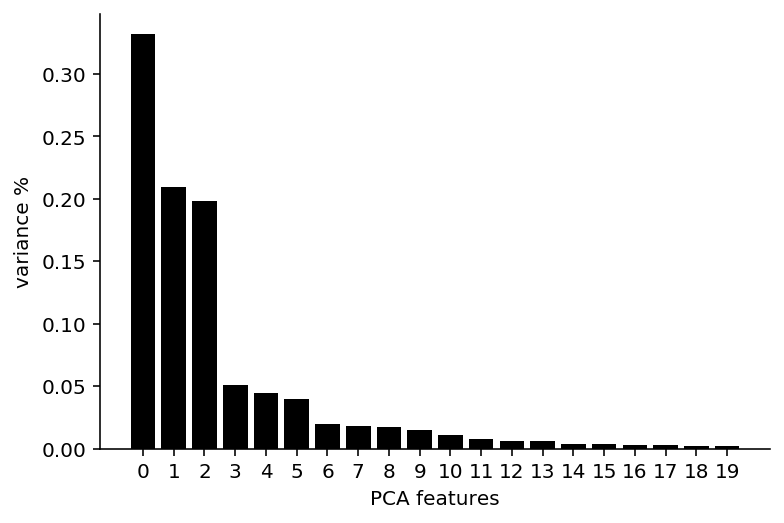

In [328]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(X_std)
pca = PCA(n_components=20)
principalComponents = pca.fit(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
sns.despine()



In [329]:
pca = PCA(n_components=6)
principalComponents = pca.fit(X_std)
scores_pca = pca.transform(X_std)
scores_pca

array([[-2.4820902 ,  3.13067809, -2.18884878, -0.41926732, -0.57596605,
        -0.1051541 ],
       [-2.14211465, -2.62410585,  0.78296439,  0.86975451, -0.45362996,
         1.15593481],
       [-3.65813999, -3.05607041,  3.52713367, -0.8678111 , -0.98058611,
        -0.09842926],
       ...,
       [-2.02923349,  1.72632177,  0.38191857, -0.80388913,  0.5031598 ,
         0.10724933],
       [ 2.18836898, -2.91378484,  1.86062584, -1.26603925, -1.77298698,
        -1.74602745],
       [-1.2420959 , -3.11573721,  2.65211273, -1.34761847,  0.73904812,
         1.07471427]])

In [330]:
#split data

x = scores_pca

tstpct = .3
x_train,x_test=train_test_split(x, test_size=tstpct)



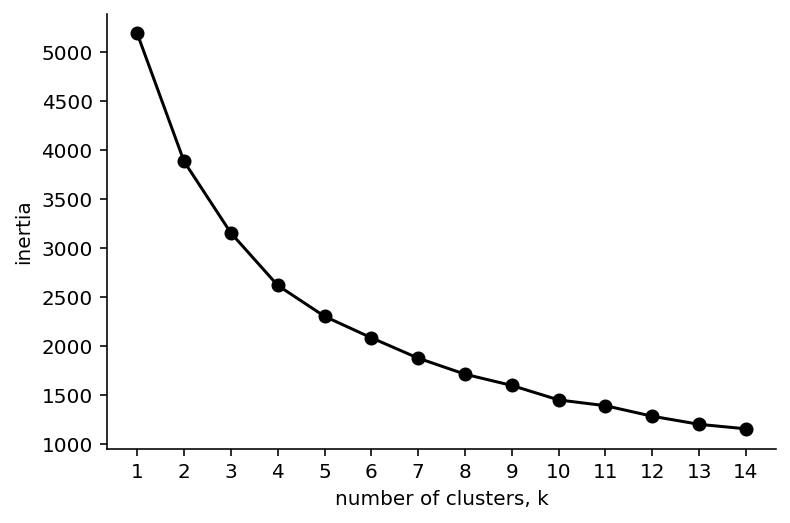

In [331]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(x_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
sns.despine()
plt.show()


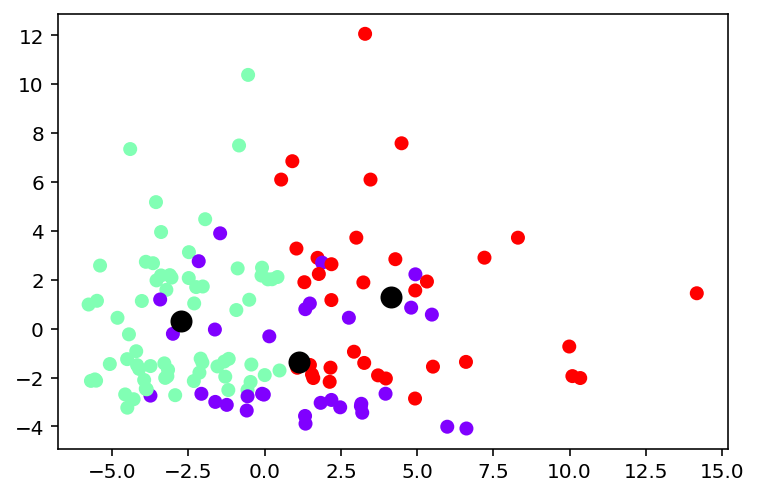

In [333]:
#inertia elbow is blurry, graph at 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(x_train)
plt.scatter(x_train[:,0], x_train[:,1], c=pred_y, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.show()

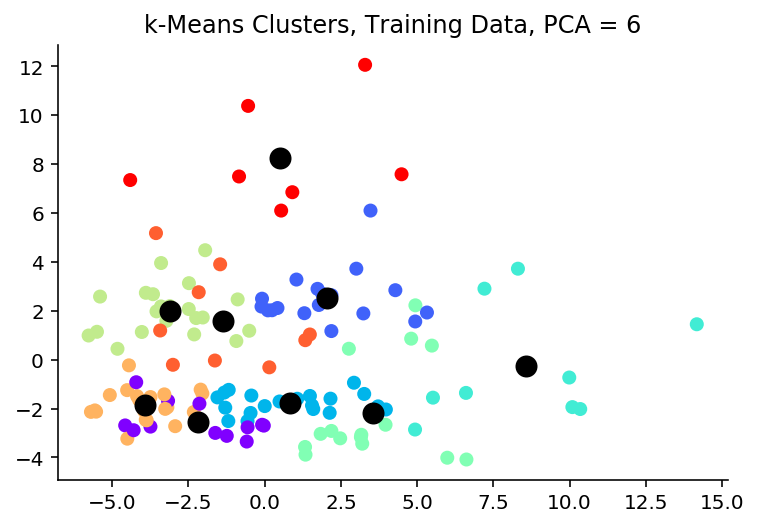

In [371]:
#knowing the complexity of the dataset,there should be at least 5 clusters (1 per position)
#therefore, i am increasing n_clusters. after looking at the output 6 clusters muddied up the distinct behaviors

n=9

kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(x_train)
plt.scatter(x_train[:,0], x_train[:,1], c=pred_y, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.title('k-Means Clusters, Training Data, PCA = 6')
sns.despine()
plt.savefig('figures/k-means clusters_train.png', bbox_inches='tight')
plt.show()

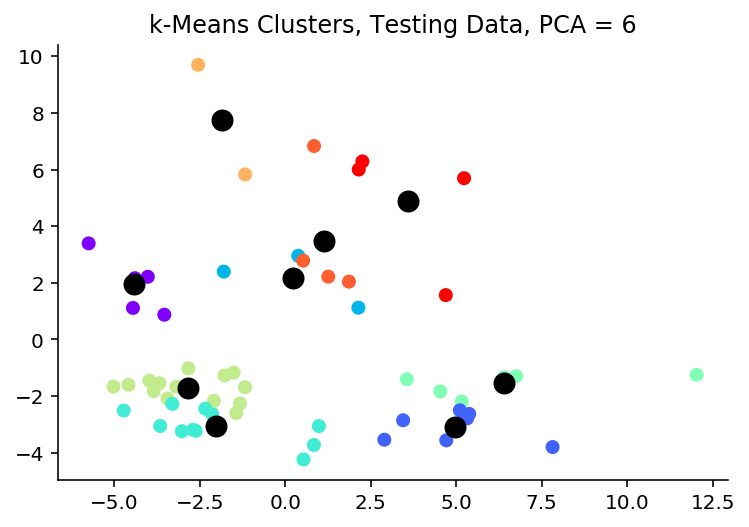

In [372]:
pred_y = kmeans.fit_predict(x_test)
plt.scatter(x_test[:,0], x_test[:,1], c=pred_y, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.title('k-Means Clusters, Testing Data, PCA = 6')
sns.despine()
plt.savefig('figures/k-means clusters_test.png', bbox_inches='tight')
plt.show()


## Combine with original dataset

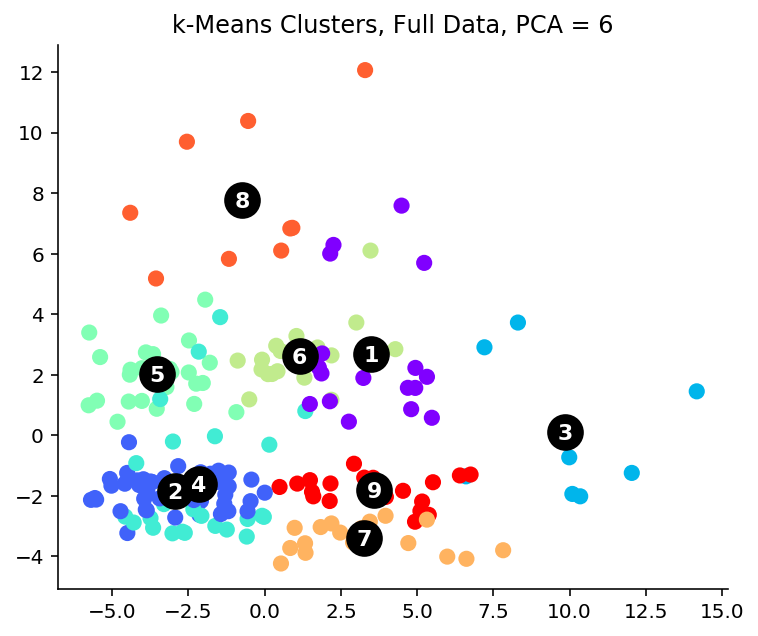

In [413]:
plt.subplots(figsize=(6,5))
kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=pred_y, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')

for i in range(n):
    plt.annotate(i+1, (kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1]-.25), c='white', 
                 ha='center', weight='bold', fontsize=11)

plt.title('k-Means Clusters, Full Data, PCA = 6')
sns.despine()
plt.savefig('figures/k-means clusters.png', bbox_inches='tight')
plt.show()

In [374]:
df_pca_kmeans = pd.concat([df.reset_index(), pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans.columns.values[-6:] = ['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6']
df_pca_kmeans['K-Means PCA'] = kmeans.labels_
# df_pca_kmeans['Segment'] = df_pca_kmeans['K-Means PCA'].map(({0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7}))
df_pca_kmeans['Segment'] = df_pca_kmeans['K-Means PCA']+1
df_pca_kmeans.head()

,Player,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,...,WS/48,eFG%,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,K-Means PCA,Segment
0,Aaron Brooks,692.0,2.520,1626.0,427.0,2.277,1122.0,2.498,1032.0,140.0,...,0.340,2.903,-2.482090,3.130678,-2.188849,-0.419267,-0.575966,-0.105154,4,5
1,Al-Farouq Aminu,620.0,1.894,1303.0,243.0,1.236,733.0,1.384,410.0,31.2,...,0.320,1.917,-2.142115,-2.624106,0.782964,0.869755,-0.453630,1.155935,1,2
2,Alex Len,701.0,1.861,1496.0,5.0,0.726,22.0,0.045,177.0,17.4,...,0.257,1.855,-3.658140,-3.056070,3.527134,-0.867811,-0.980586,-0.098429,3,4
3,Alonzo Gee,345.0,2.767,686.0,62.0,1.672,191.0,1.282,175.0,38.8,...,0.290,2.701,-5.771544,0.989458,1.283755,-1.270826,1.151226,1.185468,4,5
4,Amir Johnson,1028.0,2.419,1706.0,76.0,1.358,221.0,0.476,510.0,42.5,...,0.567,2.378,-0.084571,-2.661353,2.450006,0.933720,0.286474,0.924265,3,4


Text(0.5, 1.0, 'Count of players in each cluster, k=4')

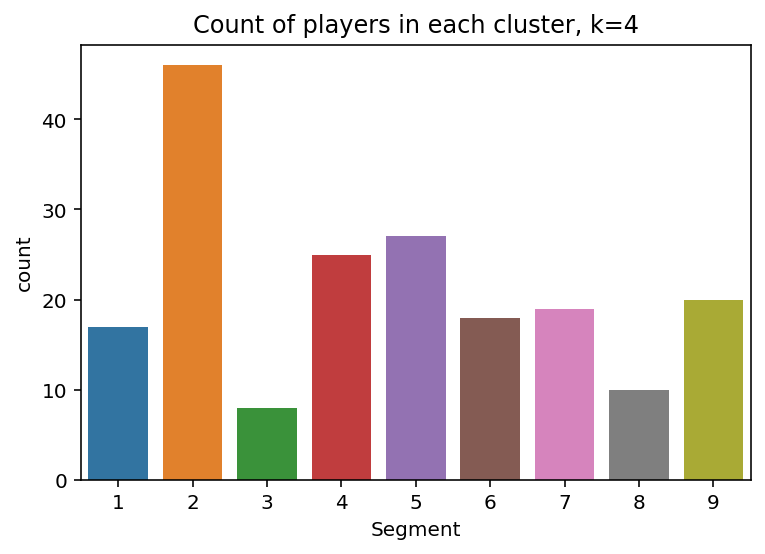

In [375]:
sns.countplot(df_pca_kmeans['Segment'])
plt.title('Count of players in each cluster, k=4')

In [376]:
for k in range(1,n+1):
    print('First 5 players in cluster ' + str(k))
    print(list(df_pca_kmeans[df_pca_kmeans['Segment'] == k]['Player'])[:5])

First 5 players in cluster 1
['Corey Brewer', 'Enes Kanter', 'Ersan Ilyasova', 'Evan Turner', 'Jeff Green']
First 5 players in cluster 2
['Al-Farouq Aminu', 'Andre Iguodala', 'Avery Bradley', 'Ben McLemore', 'Boris Diaw']
First 5 players in cluster 3
['Chris Paul', 'DeMarcus Cousins', 'Goran Dragic', 'Isaiah Thomas', 'James Harden']
First 5 players in cluster 4
['Alex Len', 'Amir Johnson', 'Aron Baynes', 'Bismack Biyombo', 'Brandon Bass']
First 5 players in cluster 5
['Aaron Brooks', 'Alonzo Gee', 'Anthony Morrow', 'Anthony Tolliver', 'Austin Rivers']
First 5 players in cluster 6
['Arron Afflalo', 'Brandon Knight', 'Channing Frye', 'Courtney Lee', 'Deron Williams']
First 5 players in cluster 7
['Andre Drummond', 'Anthony Davis', 'DeAndre Jordan', 'Derrick Favors', 'Draymond Green']
First 5 players in cluster 8
['Andre Miller', 'Beno Udrih', 'Brandon Jennings', 'D.J. Augustin', 'Derrick Williams']
First 5 players in cluster 9
['Bradley Beal', 'Carmelo Anthony', 'Damian Lillard', 'DeMar 

In [377]:
cluster_averages = df_pca_kmeans.drop('Player',axis=1)
cluster_averages = cluster_averages.groupby(by='Segment').mean()
cluster_averages

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,BLK,...,WS,WS/48,eFG%,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,K-Means PCA
Segment,,,,,,,,,,,,,,,,,,,,,
1,1533.529412,3.259824,3098.941176,262.647059,1.917412,802.882353,1.429765,770.117647,78.241176,262.352941,...,19.564706,0.564765,3.255882,3.496708,2.691885,2.951941,0.667602,-1.512175,0.076472,0
2,705.586957,1.929174,1467.478261,340.413043,1.419109,922.391304,1.557783,612.260870,55.441304,81.586957,...,12.878261,0.344130,2.039435,-2.937270,-1.839868,-1.889363,0.183944,-0.169990,-0.070003,1
3,1917.500000,2.429750,3744.875000,641.875000,1.676500,1713.125000,1.475250,2207.000000,162.275000,138.875000,...,47.187500,0.950375,2.498375,9.842002,0.098630,-3.043346,-0.874687,2.215780,0.440441,2
4,820.960000,2.393440,1601.680000,32.680000,0.662560,103.400000,0.285320,313.560000,39.156000,231.280000,...,14.532000,0.516760,2.385880,-2.160954,-1.619530,3.628511,-0.618780,0.633704,0.011308,3
5,538.148148,2.757444,1160.074074,298.888889,2.049000,828.555556,2.441556,621.037037,87.388889,64.740741,...,9.070370,0.365185,2.913333,-3.541512,2.027882,-0.637464,0.066027,0.224291,0.198707,4
6,1001.444444,2.903778,2126.111111,517.611111,2.201722,1403.222222,2.508944,1097.277778,105.477778,99.555556,...,18.561111,0.522389,3.088611,1.142414,2.610333,-1.393874,1.093755,-0.329589,0.202724,5
7,1605.631579,2.122368,3060.526316,63.052632,0.732105,193.526316,0.226211,598.736842,42.957895,379.368421,...,29.305263,0.609632,2.121053,3.252892,-3.400346,3.267344,-0.118908,-0.260776,-0.310593,6
8,842.000000,3.948900,1840.500000,267.600000,2.784300,790.400000,2.465100,1117.200000,184.230000,51.800000,...,12.270000,0.565100,4.062400,-0.749216,7.776827,0.886052,-1.419233,0.715447,-0.310531,7
9,1420.450000,1.919450,2973.050000,518.450000,1.443600,1405.600000,1.306600,1342.950000,88.660000,124.800000,...,29.500000,0.559950,2.006800,3.585138,-1.816471,-2.913854,-0.118120,-0.118264,-0.094681,8


In [378]:
cluster_averages.columns

Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', '3PAr', 'AST', 'AST%', 'BLK',
       'BLK%', 'BPM', 'DBPM', 'DRB', 'DRB%', 'DWS', 'FG', 'FG%', 'FGA', 'FT',
       'FT%', 'FTA', 'FTr', 'G', 'GS', 'MP', 'OBPM', 'ORB', 'ORB%', 'OWS',
       'PER', 'PF', 'PTS', 'STL', 'STL%', 'TOV', 'TOV%', 'TRB', 'TRB%', 'TS%',
       'USG%', 'VORP', 'WS', 'WS/48', 'eFG%', 'PCA 1', 'PCA 2', 'PCA 3',
       'PCA 4', 'PCA 5', 'PCA 6', 'K-Means PCA'],
      dtype='object')

In [379]:
cluster_averages = cluster_averages[['FG','FGA','3P','3PA','FT','FTA','ORB','DRB','TRB','AST','TOV','STL','BLK','PF','PTS','PER','MP','G']]
cluster_averages.to_excel("figures/Cluster Stats.xlsx") 
cluster_averages

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,TOV,STL,BLK,PF,PTS,PER,MP,G
Segment,,,,,,,,,,,,,,,,,,
1,1796.176471,3901.823529,262.647059,802.882353,764.235294,1034.000000,595.882353,1630.176471,2226.058824,770.117647,634.529412,341.647059,262.352941,924.941176,4619.235294,97.588235,10614.176471,385.529412
2,1046.000000,2389.869565,340.413043,922.391304,397.152174,500.760870,170.152174,709.565217,879.717391,612.260870,337.608696,218.521739,81.586957,529.739130,2829.565217,52.065217,6968.847826,283.847826
3,2559.375000,5458.000000,641.875000,1713.125000,1767.500000,2158.000000,363.875000,1549.250000,1913.125000,2207.000000,1083.125000,493.625000,138.875000,817.125000,7528.125000,116.000000,10947.375000,320.250000
4,853.640000,1705.080000,32.680000,103.400000,396.360000,568.560000,519.080000,1071.200000,1590.280000,313.560000,306.760000,148.560000,231.280000,647.480000,2136.320000,69.876000,5854.800000,295.840000
5,837.037037,1988.629630,298.888889,828.555556,316.407407,409.444444,157.037037,652.925926,809.962963,621.037037,336.111111,205.703704,64.740741,532.962963,2289.370370,66.522222,6518.185185,307.259259
6,1519.055556,3529.333333,517.611111,1403.222222,616.611111,768.000000,221.388889,1070.444444,1291.833333,1097.277778,552.166667,320.777778,99.555556,702.666667,4172.333333,83.244444,10154.333333,360.000000
7,1668.684211,3254.052632,63.052632,193.526316,814.157895,1188.421053,809.421053,1947.368421,2756.789474,598.736842,505.473684,257.105263,379.368421,752.105263,4214.578947,78.247368,9046.000000,295.263158
8,1109.600000,2630.900000,267.600000,790.400000,584.600000,759.000000,188.900000,809.000000,997.900000,1117.200000,492.200000,232.500000,51.800000,541.400000,3071.400000,109.160000,7809.800000,381.900000
9,1938.900000,4378.650000,518.450000,1405.600000,1123.550000,1346.550000,243.450000,1202.450000,1445.900000,1342.950000,662.350000,384.400000,124.800000,612.200000,5519.800000,75.915000,10053.400000,293.050000


# Part 4: Roster Construction

In [433]:
celtics_stats = celtics_players[['Player','FG','FGA','3P','3PA','FT','FTA','ORB','DRB','TRB','AST','TOV','STL','BLK','PF','PTS','MP','G']].set_index('Player')
celtics_stats.to_excel("figures/Celtics Stats.xlsx") 
celtics_stats


,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,TOV,STL,BLK,PF,PTS,MP,G
Player,,,,,,,,,,,,,,,,,
Jayson Tatum,532,1189,181,452,244,302,62,383,445,192,146,91,56,133,1489,2195,64
Jaylen Brown,417,855,125,321,174,238,61,287,348,115,123,62,18,162,1133,1867,55
Marcus Smart,250,665,133,386,124,149,42,179,221,273,101,97,29,159,757,1859,58
Kemba Walker,370,870,178,463,204,236,34,176,210,259,113,47,28,85,1122,1682,54
Gordon Hayward,331,666,79,208,118,137,52,282,334,202,94,37,21,93,859,1669,50
Daniel Theis,237,419,32,95,87,114,138,278,416,108,54,36,80,215,593,1518,63
Brad Wanamaker,154,349,36,98,119,128,22,118,140,169,75,59,14,126,463,1317,68
Grant Williams,84,201,22,89,37,52,58,109,167,65,47,30,34,155,227,999,67
Semi Ojeleye,74,179,44,116,25,29,24,112,136,35,16,19,5,78,217,964,66
